In [2]:
from sklearn.datasets import make_classification
import numpy as np
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=100_000, n_features=20, n_informative=2, n_redundant=10, random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.99, random_state=10)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss

lr = LogisticRegression()
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb,cv=2, method='isotonic')
gnb_sigmoid = CalibratedClassifierCV(gnb,cv=2, method='sigmoid')

cls_lst = [
    (lr, 'Logistic'),
    (gnb, 'Naive Bayes'),
    (gnb_isotonic, 'Naive Bayes Isotonic'),
    (gnb_sigmoid, 'Naive Bayes Sigmoid'),
]

Text(0.5, 1.0, 'Colibration')

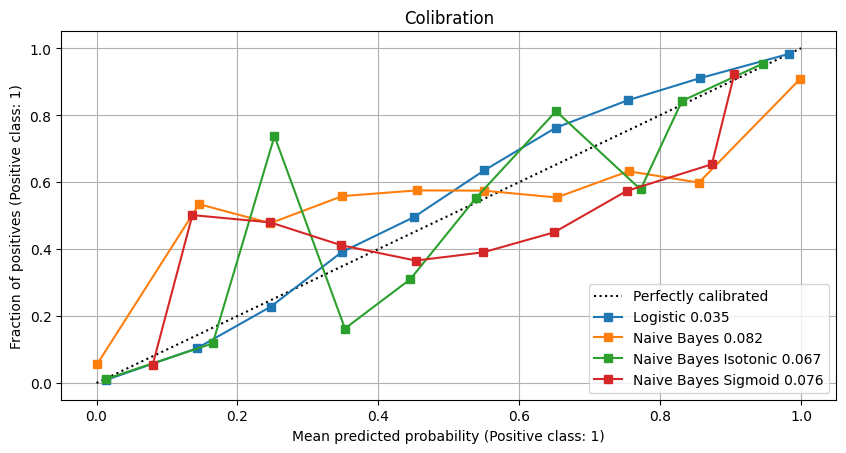

In [6]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4,2)

ax_calibration = fig.add_subplot(gs[:2,:2])
calib_display = {}

for i, (clf, name) in enumerate(cls_lst):
    clf.fit(X_train, y_train)
    bs = np.round(brier_score_loss(y_test, clf.predict_proba(X_test)[:,1]), 3)

    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name+" "+str(bs),
        ax=ax_calibration
    )
    calib_display[name] = display
ax_calibration.grid()
ax_calibration.set_title('Colibration')